In [1]:
import yfinance as yf
import numpy as np
import pandas as pd
from scipy.stats import maxwell
import matplotlib.pyplot as plt

In [2]:
data = yf.download('ETH-USD', start='2024-10-01', end='2024-11-01', interval='1h')


[*********************100%***********************]  1 of 1 completed


In [3]:
data.head()

Price,Adj Close,Close,High,Low,Open,Volume
Ticker,ETH-USD,ETH-USD,ETH-USD,ETH-USD,ETH-USD,ETH-USD
Datetime,,,,,,
2024-10-01 00:00:00+00:00,2617.759277,2617.759277,2619.881836,2592.682617,2602.030518,174098432
2024-10-01 01:00:00+00:00,2619.360840,2619.360840,2625.874756,2616.867676,2617.462158,0
2024-10-01 02:00:00+00:00,2617.157471,2617.157471,2619.632568,2607.734375,2619.632568,0
2024-10-01 03:00:00+00:00,2629.187256,2629.187256,2630.729004,2615.897949,2617.177490,0
2024-10-01 04:00:00+00:00,2643.108643,2643.108643,2644.343750,2626.892090,2628.152588,329052160


In [6]:
data.columns=['Adj_Close','Close','High','Low','Open','Volume']

In [7]:
data.head()

,Adj_Close,Close,High,Low,Open,Volume
Datetime,,,,,,
2024-10-01 00:00:00+00:00,2617.759277,2617.759277,2619.881836,2592.682617,2602.030518,174098432
2024-10-01 01:00:00+00:00,2619.360840,2619.360840,2625.874756,2616.867676,2617.462158,0
2024-10-01 02:00:00+00:00,2617.157471,2617.157471,2619.632568,2607.734375,2619.632568,0
2024-10-01 03:00:00+00:00,2629.187256,2629.187256,2630.729004,2615.897949,2617.177490,0
2024-10-01 04:00:00+00:00,2643.108643,2643.108643,2644.343750,2626.892090,2628.152588,329052160


In [8]:
data['MovingAverage'] = data['Close'].rolling(window=20).mean()
data['Deviation'] = (data['Close'] - data['MovingAverage'])

In [9]:
data.head()

,Adj_Close,Close,High,Low,Open,Volume,MovingAverage,Deviation
Datetime,,,,,,,,
2024-10-01 00:00:00+00:00,2617.759277,2617.759277,2619.881836,2592.682617,2602.030518,174098432,NaN,NaN
2024-10-01 01:00:00+00:00,2619.360840,2619.360840,2625.874756,2616.867676,2617.462158,0,NaN,NaN
2024-10-01 02:00:00+00:00,2617.157471,2617.157471,2619.632568,2607.734375,2619.632568,0,NaN,NaN
2024-10-01 03:00:00+00:00,2629.187256,2629.187256,2630.729004,2615.897949,2617.177490,0,NaN,NaN
2024-10-01 04:00:00+00:00,2643.108643,2643.108643,2644.343750,2626.892090,2628.152588,329052160,NaN,NaN


In [10]:
data = data.dropna(subset=['MovingAverage'])

In [11]:
data1= data[['Close','MovingAverage','Deviation']]

In [12]:
data1.head()

,Close,MovingAverage,Deviation
Datetime,,,
2024-10-01 19:00:00+00:00,2488.456543,2594.981226,-106.524683
2024-10-01 20:00:00+00:00,2447.214600,2586.453992,-139.239392
2024-10-01 21:00:00+00:00,2469.841797,2578.978040,-109.136243
2024-10-01 22:00:00+00:00,2453.203613,2570.780347,-117.576733
2024-10-01 23:00:00+00:00,2449.943848,2561.818176,-111.874329


In [13]:
data['Deviation'].isnull().sum()

0

In [14]:
#Plot Maxwell Distribution
def plot_maxwell_distribution(deviations, scale_param, current_deviation=None):
    """
    Plot the Maxwell distribution and overlay the current deviation if provided.
    """
    deviations = deviations.dropna()
    x = np.linspace(0, max(deviations), 500)
    pdf = maxwell.pdf(x, scale=scale_param)
    
    plt.figure(figsize=(10, 6))
    plt.plot(x, pdf, label='Maxwell Distribution', color='blue')
    plt.hist(deviations, bins=30, density=True, alpha=0.6, color='orange', label='Observed Deviations')
    
    if current_deviation:
        plt.axvline(current_deviation, color='red', linestyle='--', label=f"Current Deviation: {current_deviation:.2f}")
    
    plt.title('Maxwell Distribution Fit to Deviations')
    plt.xlabel('Deviation')
    plt.ylabel('Density')
    plt.legend()
    plt.show()

In [15]:
scale_param = maxwell.fit(data['Deviation'], floc=0)[1]
print(f"Fitted Maxwell Distribution Scale Parameter: {scale_param:.4f}")

# Get the latest deviation
latest_deviation = data['Deviation'].iloc[-1]

Fitted Maxwell Distribution Scale Parameter: 15.0768


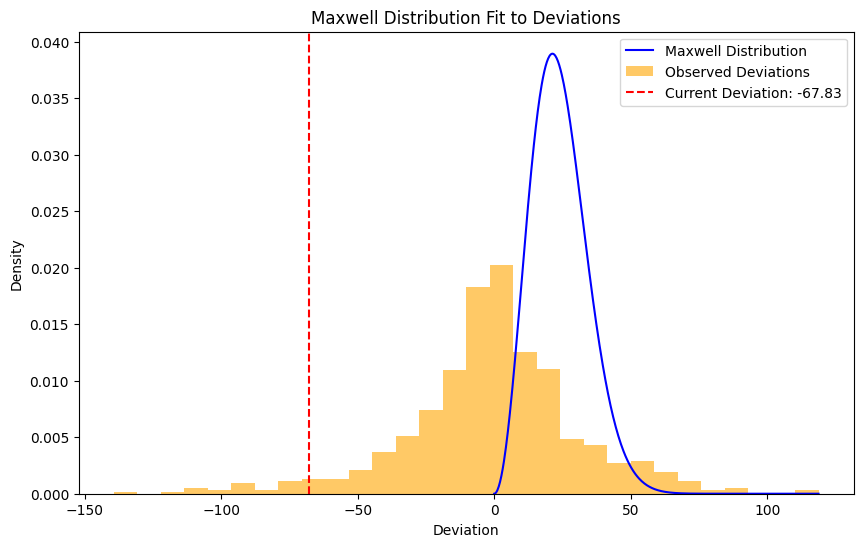

In [16]:
plot_maxwell_distribution(data['Deviation'], scale_param, current_deviation=latest_deviation)


In [20]:
data1['CDF'] = maxwell.cdf(data1['Deviation'], scale=scale_param)
data1['BuySignal'] = False  # Initialize column with False

last_signal_date = None  # Track the date of the last buy signal

for i in range(len(data1)):
        # Check if the CDF is below the threshold
     if data1.iloc[i]['CDF'] < 0.07:
        if last_signal_date is None or (data1.index[i] - last_signal_date).days >= 2:
            data1.loc[data1.index[i], 'BuySignal'] = True
            last_signal_date = data1.index[i] 

C:\Users\adars\AppData\Local\Temp\ipykernel_4556\1354530367.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1['CDF'] = maxwell.cdf(data1['Deviation'], scale=scale_param)
C:\Users\adars\AppData\Local\Temp\ipykernel_4556\1354530367.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1['BuySignal'] = False  # Initialize column with False


In [18]:
data1.head()

,Close,MovingAverage,Deviation,CDF,BuySignal
Datetime,,,,,
2024-10-01 19:00:00+00:00,2488.456543,2594.981226,-106.524683,0.0,True
2024-10-01 20:00:00+00:00,2447.214600,2586.453992,-139.239392,0.0,False
2024-10-01 21:00:00+00:00,2469.841797,2578.978040,-109.136243,0.0,False
2024-10-01 22:00:00+00:00,2453.203613,2570.780347,-117.576733,0.0,False
2024-10-01 23:00:00+00:00,2449.943848,2561.818176,-111.874329,0.0,False


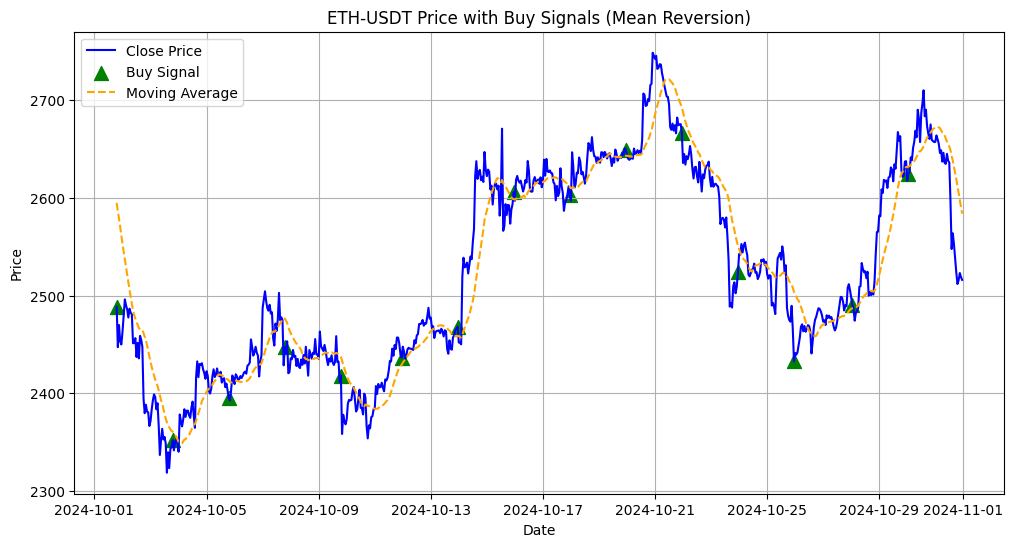

In [21]:
plt.figure(figsize=(12, 6))
    
# Plot the closing price
plt.plot(data1.index, data1['Close'], label='Close Price', color='blue')
        
# Highlight buy signals
buy_signals = data1[data1['BuySignal']]
plt.scatter(buy_signals.index, buy_signals['Close'], color='green', label='Buy Signal', marker='^', s=100)
    
# Plot moving average
plt.plot(data1.index, data1['MovingAverage'], label='Moving Average', color='orange', linestyle='--')
    
plt.title(f"ETH-USDT Price with Buy Signals (Mean Reversion)")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.grid()
plt.show()